# Machine learning for Income classification


# 1. Getting and processing the data

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    auc,
    roc_curve,
    precision_recall_curve,
    confusion_matrix,
    average_precision_score,
)

warnings.filterwarnings("ignore")


In [6]:
# Importing data
file_path="..\\data\\einkommen_train.csv"
data = pd.read_csv(file_path, sep=';', na_values=["?"],encoding='utf-8')

In [7]:
data.head(15)

,Age,Employment sector,Weighting factor,Education level,Training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Investment gains,Investment losses,Weekly working time,Country of birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [8]:
data.isnull().sum()

Age                    0
Employment sector      0
Weighting factor       0
Education level        0
Training period        0
Marital status         0
Employment area        0
Partnership            0
Ethnicity              0
Gender                 0
Investment gains       0
Investment losses      0
Weekly working time    0
Country of birth       0
Income                 0
dtype: int64

Although the the data has [?] as null values, pandas is unable to process it, hence using regular expression library.

In [9]:
# Regex for NaN identification
data=data.replace('[?]', np.nan, regex=True)

In [10]:
# Understanding the dependent classes
data["Income"].unique()

array([' <=50K', ' >50K', nan], dtype=object)

In [11]:
# Using regular expressions to map ' <=50K' to 0 and ' >50K' to 1
data['Income'] = data['Income'].replace({' <=50K': 0, ' >50K': 1}, regex=True)

In [12]:
data.head()

,Age,Employment sector,Weighting factor,Education level,Training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Investment gains,Investment losses,Weekly working time,Country of birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0


In [13]:
data.isnull().sum()

Age                        0
Employment sector       1677
Weighting factor           0
Education level            0
Training period            0
Marital status             0
Employment area         1682
Partnership                0
Ethnicity                  0
Gender                     0
Investment gains           0
Investment losses          0
Weekly working time        0
Country of birth         539
Income                 25000
dtype: int64

Now the no. of Null values are visible

In [14]:
# Generalizing the education levels and marital statuses
print("Education levels:",data['Education level'].unique())
print("Martial statuses:",data['Marital status'].unique())

Education levels: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Martial statuses: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


In [15]:

# Define a dictionary to map old education levels to new ones with regular expressions
education_mapping = {
    r'\bPreschool\b': 'dropout',
    r'\b10th\b': 'dropout',
    r'\b11th\b': 'dropout',
    r'\b12th\b': 'HighGrad',
    r'\b1st-4th\b': 'dropout',
    r'\b5th-6th\b': 'dropout',
    r'\b7th-8th\b': 'dropout',
    r'\b9th\b': 'dropout',
    r'\bHS-Grad\b': 'HighGrad',
    r'\bHS-grad\b': 'HighGrad',
    r'\bSome-college\b': 'CommunityCollege',
    r'\bAssoc-acdm\b': 'CommunityCollege',
    r'\bAssoc-voc\b': 'CommunityCollege',
    r'\bBachelors\b': 'Bachelors',
    r'\bMasters\b': 'Masters',
    r'\bProf-school\b': 'Masters',
    r'\bDoctorate\b': 'Doctorate'
}

# Iterate through the dictionary and apply replacements using regex
for pattern, replacement in education_mapping.items():
    data['Education level'] = data['Education level'].str.replace(pattern, replacement)

# Print the updated DataFrame
#print(data)


In [16]:

# Define a dictionary to map old marital statuses to new ones with regular expressions
marital_mapping = {
    'Never-married': 'NotMarried',
    r'\bMarried-AF-spouse\b': 'Married',
    r'\bMarried-civ-spouse\b': 'Married',
    r'\bMarried-spouse-absent\b': 'NotMarried',
    r'\bSeparated\b': 'Separated',
    r'\bDivorced\b': 'Separated',
    r'\bWidowed\b': 'Widowed'
}

# Iterate through the dictionary and apply replacements using regex
for pattern, replacement in marital_mapping.items():
    data['Marital status'] = data['Marital status'].str.replace(pattern, replacement)



In [17]:
data.head(15)

,Age,Employment sector,Weighting factor,Education level,Training period,Marital status,Employment area,Partnership,Ethnicity,Gender,Investment gains,Investment losses,Weekly working time,Country of birth,Income
0,39,State-gov,77516,Bachelors,13,NotMarried,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0.0
2,38,Private,215646,HighGrad,9,Separated,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0.0
3,53,Private,234721,dropout,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0.0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0.0
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,United-States,0.0
6,49,Private,160187,dropout,5,NotMarried,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0.0
7,52,Self-emp-not-inc,209642,HighGrad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,United-States,1.0
8,31,Private,45781,Masters,14,NotMarried,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1.0
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1.0


In [18]:
# Creating function to fill coulmns with mode
def fill_columns_with_mode(data, columns_to_fill):
    """
    Fill specified columns in a DataFrame with their respective modes.

    Parameters:
    - data: pandas DataFrame
        The DataFrame containing the data.
    - columns_to_fill: list
        A list of column names to fill with their modes.

    Returns:
    - filled_data: pandas DataFrame
        The DataFrame with missing values in specified columns filled with their modes.
    """

    #filled_data = data.copy()  # Create a copy of the original DataFrame to avoid modifying it directly

    for column in columns_to_fill:
        mode_value = data[column].mode()[0]
        data[column].fillna(mode_value, inplace=True)

    return data

### Filling the missing values.

In [19]:
# Filling Employment area, Employment sector, Country of birth with mode.
columns_to_fill = ['Employment sector', 'Employment area', 'Country of birth']

# Call the function to fill the specified columns with their modes
data = fill_columns_with_mode(data, columns_to_fill)


In [20]:
data.isnull().sum()

Age                        0
Employment sector          0
Weighting factor           0
Education level            0
Training period            0
Marital status             0
Employment area            0
Partnership                0
Ethnicity                  0
Gender                     0
Investment gains           0
Investment losses          0
Weekly working time        0
Country of birth           0
Income                 25000
dtype: int64

### EDA

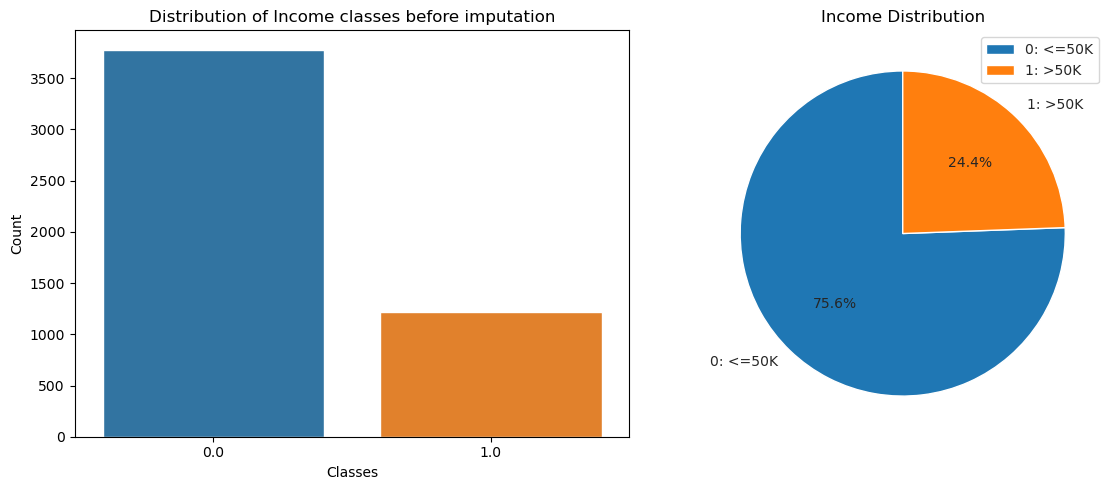

In [21]:
# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the bar chart on the first subplot using Seaborn
sns.set_style('whitegrid')  # You can choose a different style if desired
sns.countplot(data=data, x='Income', ax=ax1)
ax1.set_xlabel('Classes')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Income classes before imputation')

# Plot the pie chart on the second subplot using Seaborn
sns.set_style('white')  # You can choose a different style if desired
counts = data['Income'].value_counts()
ax2.pie(counts, labels=['0: <=50K', '1: >50K'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Income Distribution')

# Add a legend for the pie chart and position it
ax2.legend(labels=['0: <=50K', '1: >50K'], loc='upper right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


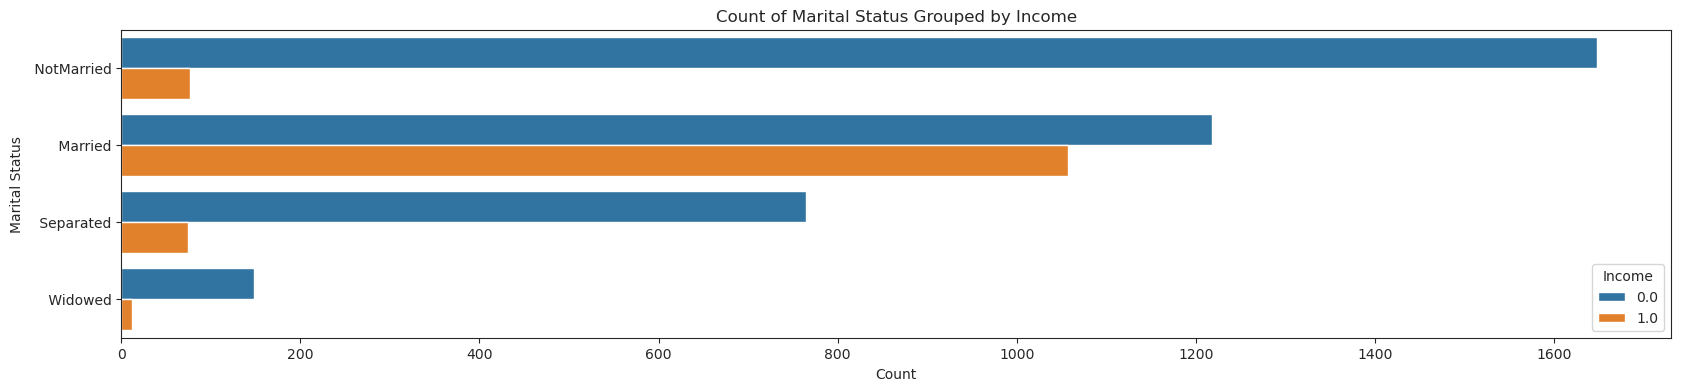

In [22]:

# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Create a count plot with grouping by "Income" column
sns.countplot(y="Marital status", hue="Income", data=data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Marital Status")
plt.title("Count of Marital Status Grouped by Income")

# Show the plot
plt.show()


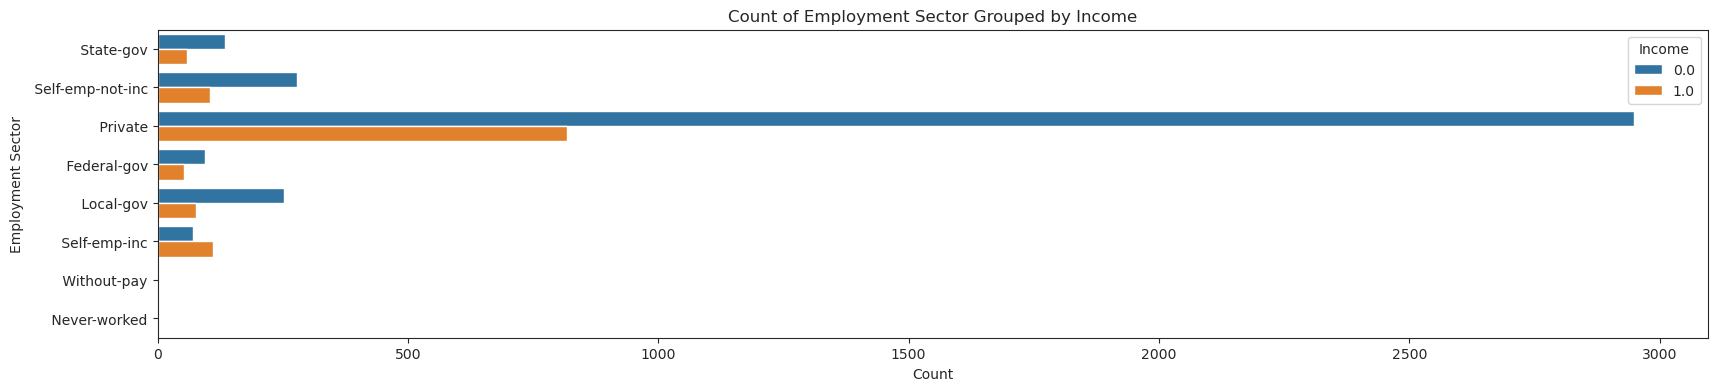

In [23]:
# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Create a count plot with grouping by "Income" column
sns.countplot(y="Employment sector", hue="Income", data=data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Employment Sector")
plt.title("Count of Employment Sector Grouped by Income")

# Show the plot
plt.show()


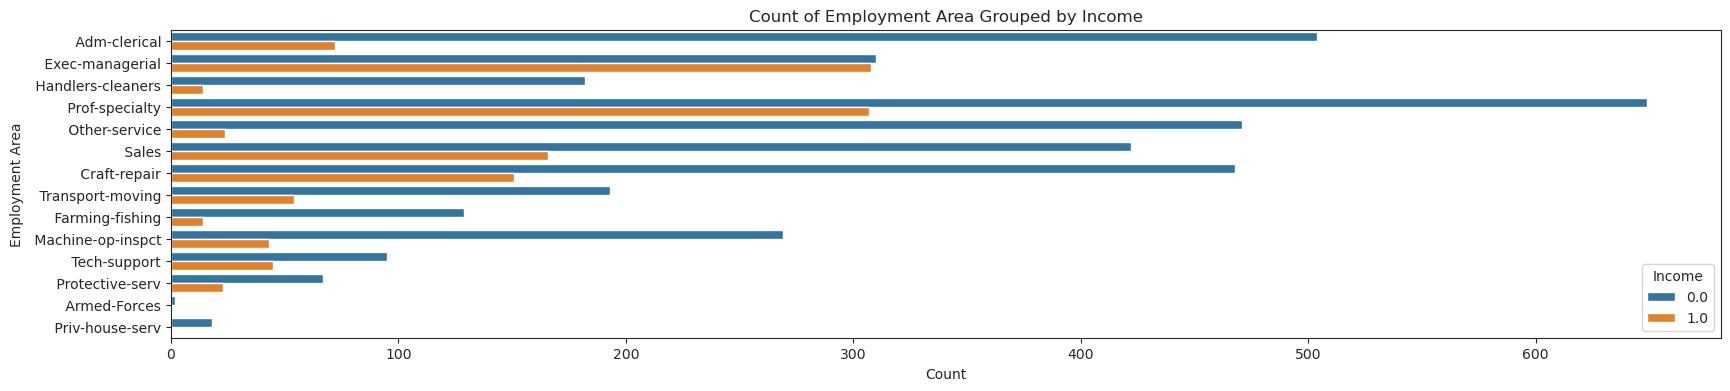

In [24]:
# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Create a count plot with grouping by "Income" column
sns.countplot(y="Employment area", hue="Income", data=data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Employment Area")
plt.title("Count of Employment Area Grouped by Income")

# Show the plot
plt.show()


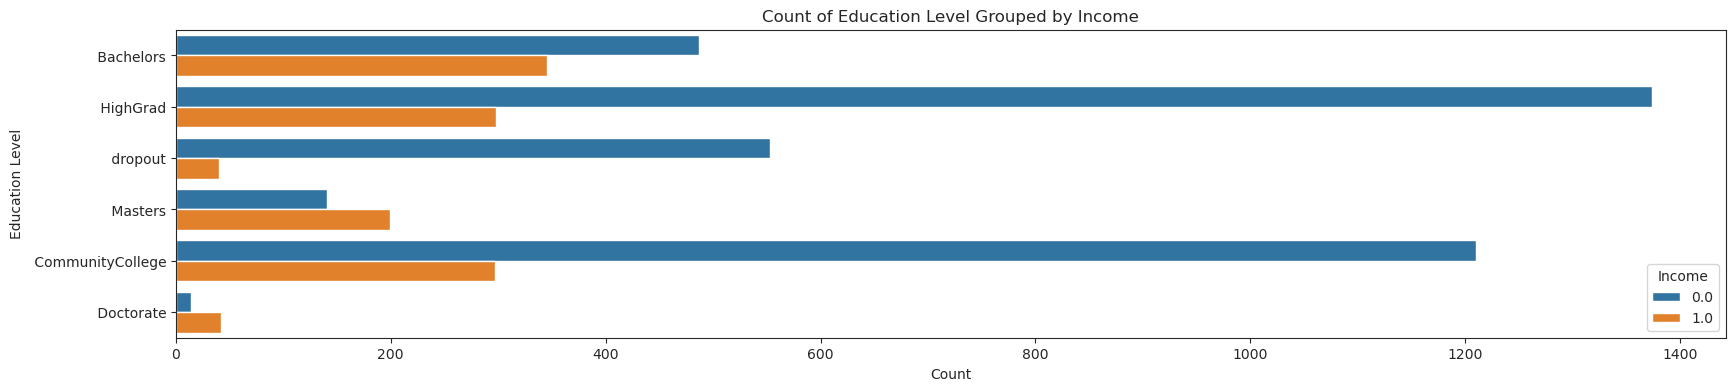

In [25]:
# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Create a count plot with grouping by "Income" column
sns.countplot(y="Education level", hue="Income", data=data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.title("Count of Education Level Grouped by Income")

# Show the plot
plt.show()


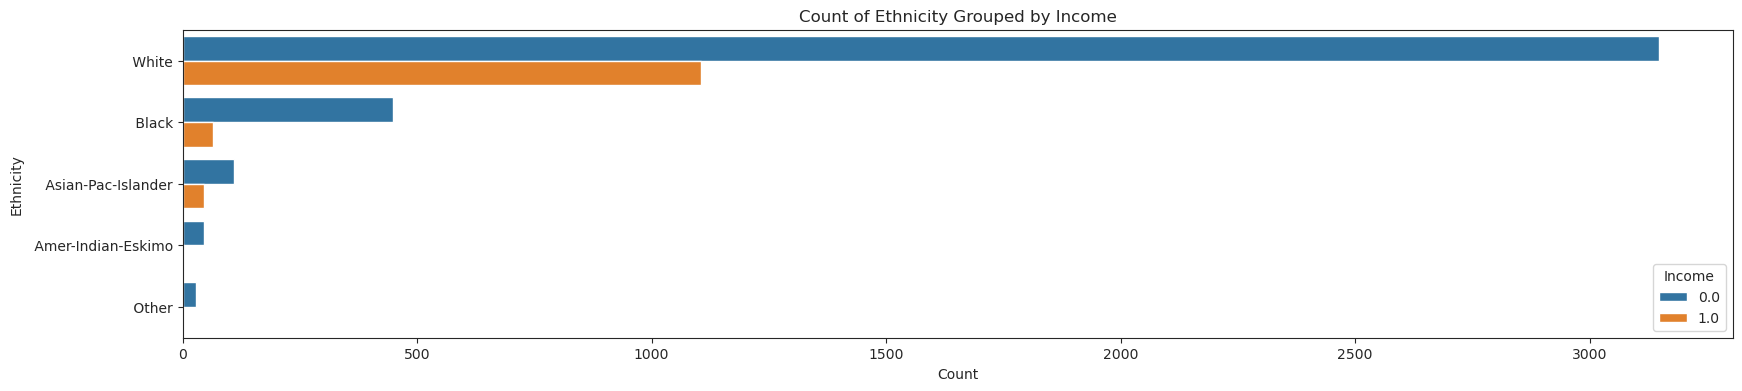

In [26]:
# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Create a count plot with grouping by "Income" column
sns.countplot(y="Ethnicity", hue="Income", data=data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Ethnicity")
plt.title("Count of Ethnicity Grouped by Income")

# Show the plot
plt.show()


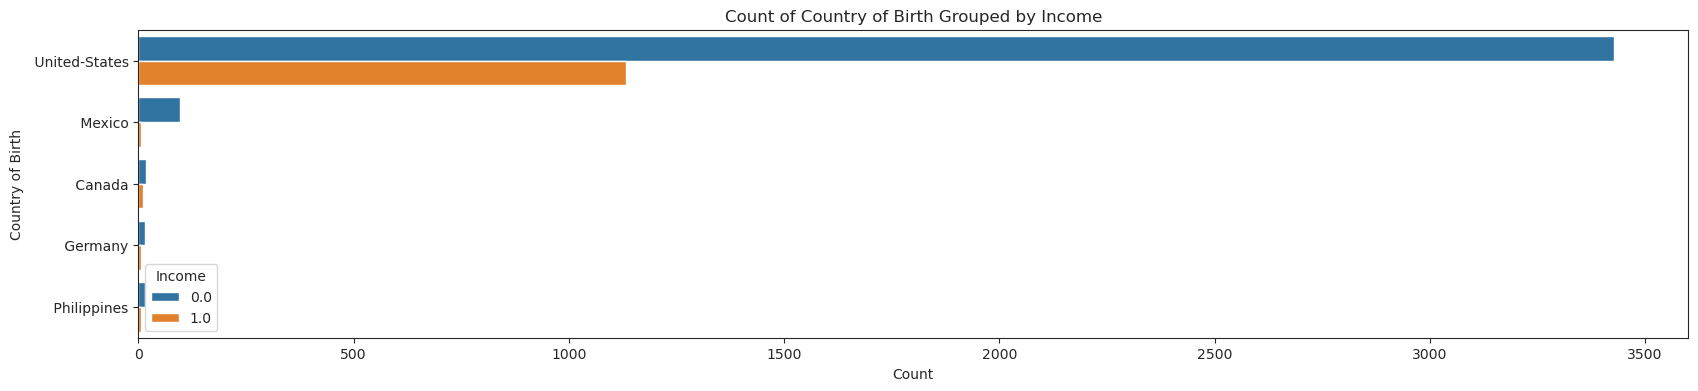

In [27]:
# Set the style
sns.set_style('ticks')

# Create a figure
plt.figure(figsize=(20, 4))

# Get the top 10 values for the "Country of birth" column
top_10_countries = data['Country of birth'].value_counts().head(5).index

# Filter the data to include only the top 10 countries
filtered_data = data[data['Country of birth'].isin(top_10_countries)]

# Create a count plot with grouping by "Income" column
sns.countplot(y="Country of birth", hue="Income", data=filtered_data)

# Set labels and title
plt.xlabel("Count")
plt.ylabel("Country of Birth")
plt.title("Count of Country of Birth Grouped by Income")

# Show the plot
plt.show()


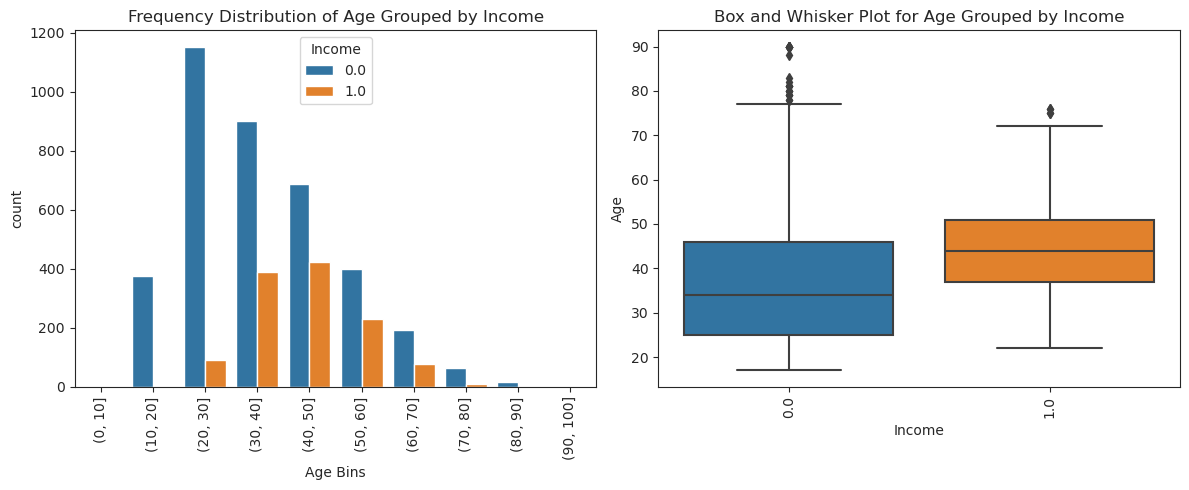

In [28]:

# Create custom age bins with a bin size of 10
age_bins = range(0, 101, 10)
data_copy = data.copy()  # Create a copy of the DataFrame
data_copy['Age Bins'] = pd.cut(data_copy['Age'], bins=age_bins)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot frequency distribution (countplot) for Age with custom bins, grouped by "Income"
sns.set_style('ticks')
sns.countplot(data=data_copy, x='Age Bins', hue='Income', ax=axes[0])
axes[0].set_title('Frequency Distribution of Age Grouped by Income')

# Rotate X-axis ticks for the countplot
axes[0].tick_params(axis='x', rotation=90)

# Plot box and whisker plot for Age, grouped by "Income"
sns.set_style('whitegrid')  # You can choose a different style if desired
sns.boxplot(data=data_copy, x='Income', y='Age', ax=axes[1])
axes[1].set_title('Box and Whisker Plot for Age Grouped by Income')

# Rotate X-axis ticks for the boxplot
axes[1].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


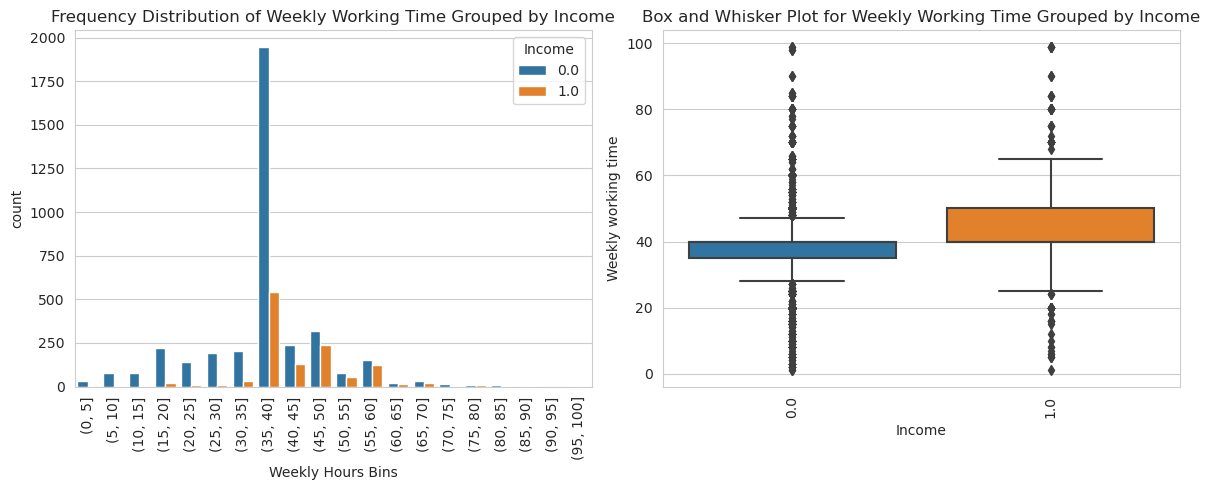

In [29]:


# Create custom bins for Weekly working time with a bin size of 5
weekly_hours_bins = range(0, 101, 5)
data_copy['Weekly Hours Bins'] = pd.cut(data_copy['Weekly working time'], bins=weekly_hours_bins)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot frequency distribution (countplot) for Weekly working time with custom bins
sns.set_style('ticks')
sns.countplot(data=data_copy, x='Weekly Hours Bins', hue='Income', ax=axes[0])
axes[0].set_title('Frequency Distribution of Weekly Working Time Grouped by Income')

# Rotate X-axis ticks for the countplot
axes[0].tick_params(axis='x', rotation=90)

# Plot box and whisker plot for Weekly working time, grouped by "Income"
sns.set_style('whitegrid')  # You can choose a different style if desired
sns.boxplot(data=data_copy, x='Income', y='Weekly working time', ax=axes[1], showfliers=True)
axes[1].set_title('Box and Whisker Plot for Weekly Working Time Grouped by Income')

# Rotate X-axis ticks for the boxplot
axes[1].tick_params(axis='x', rotation=90)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## Data processing
1. Imputation through random sampling
2. Imputation through predective modelling

### 1. Through random sampling

In [30]:
# Applying onehot encoding to the categorical variables of the datatset, for predective imputing.
categorical_columns = ['Employment sector','Education level','Marital status','Employment area','Partnership','Ethnicity','Gender','Country of birth']

# Apply one-hot encoding
df_encoded = pd.get_dummies(data, columns=categorical_columns)

In [31]:
# Creating a new dataframe for imputatation through random sampling.
data_random_impute = df_encoded.copy()

In [32]:
# Distribution of the income class
class_distribution = data_random_impute['Income'].value_counts(normalize=True)
print("Income class distribution before imputation",class_distribution)

Income class distribution before imputation 0.0    0.7558
1.0    0.2442
Name: Income, dtype: float64


In [33]:
def impute_categorical_missing(row):
    """
    Impute missing values in the 'Income' column of a DataFrame row with a random category based on a distribution.

    Parameters:
    ----------
    row : pandas Series
        A single row from a DataFrame containing at least the 'Income' column.

    Returns:
    -------
    str or float
        If the 'Income' column in the input row is missing (NaN), a randomly selected category is returned based on a
        cumulative weight distribution. If the 'Income' column is not missing, the original 'Income' value is returned.

    """
    if pd.isna(row['Income']):
        # Generate a random number between 0 and 1
        rand_num = np.random.rand()
        # Select the category based on cumulative weights
        cumulative_weights = class_distribution.cumsum()
        selected_category = class_distribution.index[(cumulative_weights >= rand_num).argmax()]
        return selected_category
    else:
        return row['Income']


Using class preserving to random sampling to protect the oroginal nature of data.

In [34]:
# Apply the imputation function to fill missing values
data_random_impute['Income'] = data_random_impute.apply(impute_categorical_missing, axis=1)

In [35]:
# Income class distribution after random sampling
class_distribution_after = data_random_impute['Income'].value_counts(normalize=True)
print("Income class distribution After imputation",class_distribution_after)

Income class distribution After imputation 0.0    0.753233
1.0    0.246767
Name: Income, dtype: float64


In [36]:
data_random_impute['Income'].isnull().sum()

0

### 2. Imputation through predective modelling (logisitic regression)

In [37]:
# Creating a temporary dataframe for predective imputation through logistic regression
temp_data = df_encoded.copy()

In [38]:
temp_data.head()

,Age,Weighting factor,Training period,Investment gains,Investment losses,Weekly working time,Income,Employment sector_ Federal-gov,Employment sector_ Local-gov,Employment sector_ Never-worked,...,Country of birth_ Portugal,Country of birth_ Puerto-Rico,Country of birth_ Scotland,Country of birth_ South,Country of birth_ Taiwan,Country of birth_ Thailand,Country of birth_ Trinadad&Tobago,Country of birth_ United-States,Country of birth_ Vietnam,Country of birth_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using logistic regression for predective imputing

In [39]:
# Predective imputing


# Split the data into two subsets: one with missing 'Income' and one without
data_missing_income = temp_data[temp_data['Income'].isnull()]
data_not_missing_income = temp_data[~temp_data['Income'].isnull()]

# Separate features and target variable for the subset without missing 'Income'
X1 = data_not_missing_income.drop('Income', axis=1)
y1 = data_not_missing_income['Income']


# Split the data with non-missing 'Income' into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Train a logistic regression model
logistic_imputer = LogisticRegression(max_iter=1000) 
logistic_imputer.fit(X1_train, y1_train)

# Use the trained model to predict 'Income' for the subset with missing 'Income'
X_missing_income = data_missing_income.drop('Income', axis=1)
imputed_income = logistic_imputer.predict(X_missing_income)

# Fill in the missing 'Income' values with the predicted values
data_missing_income.loc[:, 'Income'] = imputed_income


# Combine the two subsets back into a single DataFrame
data_pred_impute = pd.concat([data_not_missing_income, data_missing_income])

In [40]:
# Checking null values before imputation
temp_data["Income"].isnull().sum()

25000

In [41]:
# Null values after imputation
data_pred_impute['Income'].isnull().sum()

0

## Testing Baseline (Random) model, Logistic regression & Decision tree on both the datasets i.e, imputed through Random sampling and predecvtive modelling.

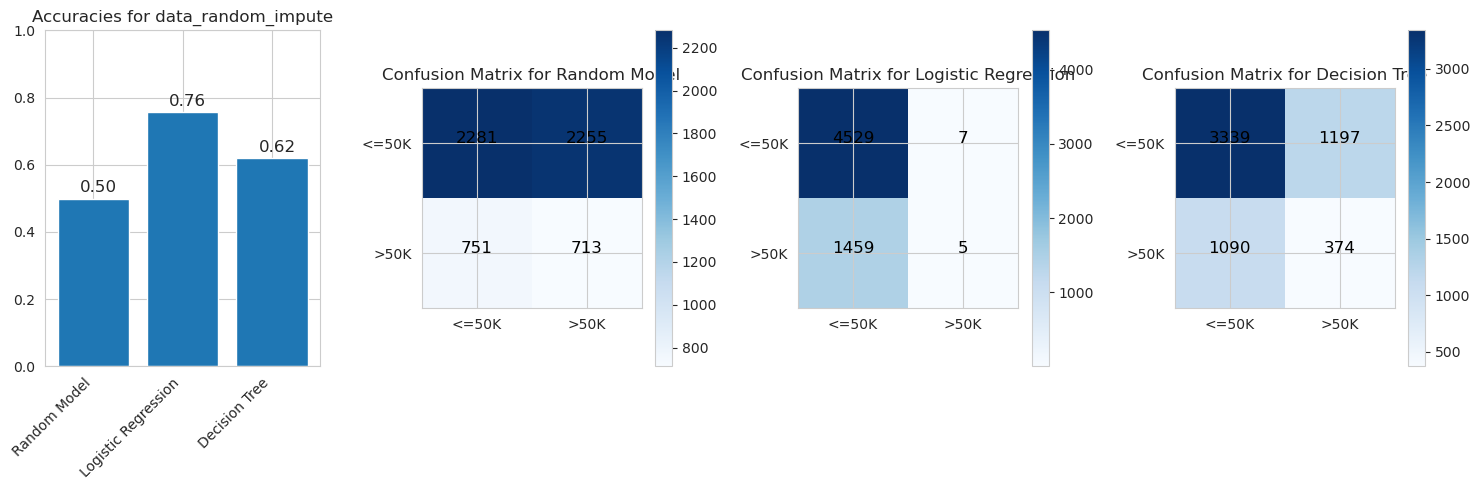

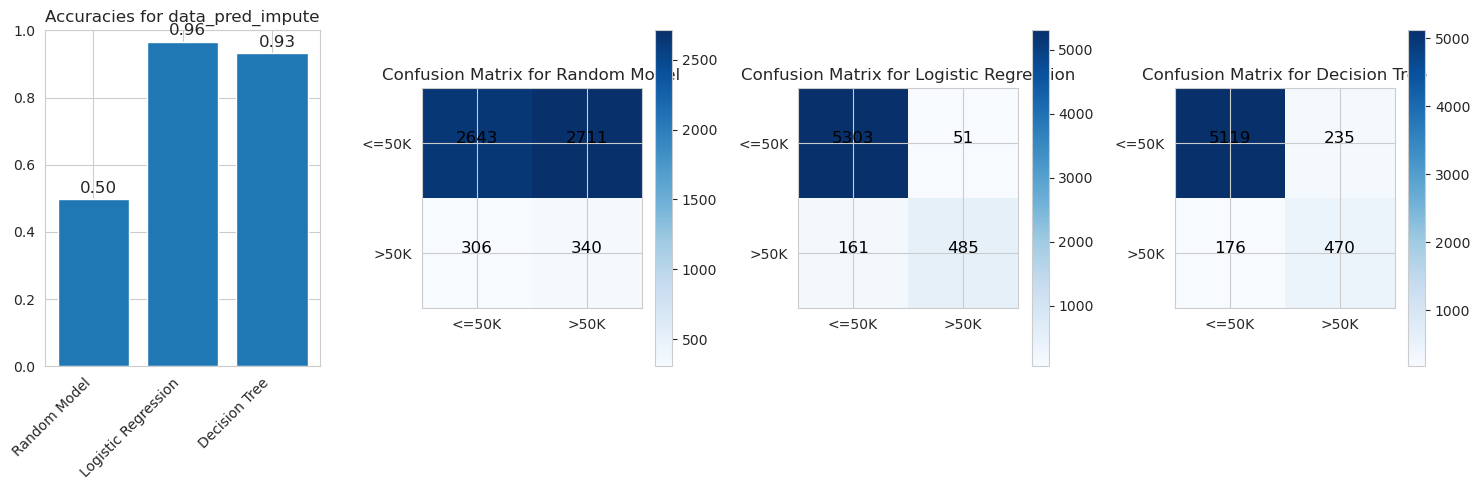

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load your datasets (data_random_impute and data_pred_impute)
# Assuming your datasets are in DataFrames with 'Income' as the target column and other features

# Define models
models = {
    "Random Model": None,
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier()
}

# Iterate over datasets
datasets = [data_random_impute, data_pred_impute]

for dataset_name, dataset in zip(["data_random_impute", "data_pred_impute"], datasets):
    X = dataset.drop("Income", axis=1)
    y = dataset["Income"]
    
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize dictionaries to store results
    accuracies = {}
    confusion_matrices = {}
    
    # Iterate over models
    for model_name, model in models.items():
        if model_name == "Random Model":
            # Create a random model (assign random values to predictions)
            y_pred = np.random.randint(2, size=len(y_test))
        else:
            # Train the model
            model.fit(X_train, y_train)
            
            # Make predictions
            y_pred = model.predict(X_test)
        
        # Calculate accuracy and confusion matrix
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        accuracies[model_name] = accuracy
        confusion_matrices[model_name] = conf_matrix
    
    # Plot results for this dataset
    plt.figure(figsize=(15, 5))
    
    # Plot accuracies with rotated x-axis labels
    plt.subplot(1, 4, 1)
    bars = plt.bar(accuracies.keys(), accuracies.values())
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels
    plt.title(f"Accuracies for {dataset_name}")
    plt.ylim([0, 1])

    # Add accuracy values on top of each bar
    for bar, acc in zip(bars, accuracies.values()):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, acc + 0.02, f"{acc:.2f}", fontsize=12)
    
    # Plot confusion matrices as heatmaps
    for i, (model_name, conf_matrix) in enumerate(confusion_matrices.items(), start=2):
        plt.subplot(1, 4, i)
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f"Confusion Matrix for {model_name}")
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["<=50K", ">50K"])
        plt.yticks(tick_marks, ["<=50K", ">50K"])
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="black", fontsize=12)
    
    plt.tight_layout()
    plt.show()


* ### It is evident that models built on the dataset (data_pred_impute), which involves imputing NaN values in the dependent columns through predictive modeling, perform significantly better than the models built using the dataset (data_random_impute), which is obtained through random sampling-based imputation while preserving the class distribution of the dependent column (Income).

## Now, we are building Randmom Forest & Gaussian Naive Bayes in addition to the previously used models on the best-performing dataset. Additionally, we are selecting important features based on random forest feature importance scores.

#### Feature importance through random forest

In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load your dataset (data_pred_impute)
# Assuming it is a DataFrame with 'Income' as the target column and other features

X2 = data_pred_impute.drop("Income", axis=1)
y2 = data_pred_impute["Income"]

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X2, y2)

# Get feature importances from the trained RF classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': X2.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


In [45]:
# Print the feature importance DataFrame with extended output
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(feature_importance_df)


                                         Feature    Importance
3                               Investment gains  3.528705e-01
4                              Investment losses  1.426372e-01
1                               Weighting factor  1.418441e-01
0                                            Age  9.673802e-02
5                            Weekly working time  5.654973e-02
2                                Training period  2.917344e-02
20                       Marital status_ Married  1.238873e-02
27              Employment area_ Exec-managerial  8.341612e-03
9                     Employment sector_ Private  8.296928e-03
38                          Partnership_ Husband  7.792349e-03
33               Employment area_ Prof-specialty  6.566759e-03
18                      Education level_ Masters  6.353607e-03
21                    Marital status_ NotMarried  6.090806e-03
35                        Employment area_ Sales  5.333362e-03
10               Employment sector_ Self-emp-inc  5.078

#### Less than 10 features have higher importance value, hence dropping the columns with low importance.

In [46]:
# Filter features with four or more zeros after the decimal point
filtered_features = feature_importance_df[
    feature_importance_df['Importance'].apply(lambda x: x % 1 < 1e-2)
]

# Create a new DataFrame by dropping the filtered features
imp_df = data_pred_impute.drop(filtered_features['Feature'], axis=1)



In [47]:
imp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      30000 non-null  int64  
 1   Weighting factor         30000 non-null  int64  
 2   Training period          30000 non-null  int64  
 3   Investment gains         30000 non-null  int64  
 4   Investment losses        30000 non-null  int64  
 5   Weekly working time      30000 non-null  int64  
 6   Income                   30000 non-null  float64
 7   Marital status_ Married  30000 non-null  uint8  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 1.9 MB


In [51]:
from tabulate import tabulate
# Creating function for tabulating the results 
def print_results(heading, results_dict):
    table = []
    headers = ["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC", "AUPRC"]

    for model_name, metrics in results_dict.items():
        row = [model_name]
        for metric_name in headers[1:]:
            row.append(metrics[metric_name])
        table.append(row)

    print(heading)
    print(tabulate(table, headers=headers, tablefmt="grid"))


**After dropping the rows whose Imprtance values had more than two zeros after the decimal, we are left with 8 columns.**

### Modelling through Logisitc, DT, RF, NB, on data set dataset obtained tbrough predective imputation, before and after feature selection.

In [48]:
def fit_and_evaluate_models(data, dependent_column):
    # Split the data into features and the dependent column
    X = data.drop(dependent_column, axis=1)
    y = data[dependent_column]

    # Initialize models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(), 
        "Random Forest": RandomForestClassifier(),
        "Gaussian Naive Bayes": GaussianNB(),
         
    }

    results = {}

    for model_name, model in models.items():
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        #precision = precision_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division='warn')

        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Calculate ROC-AUC and AUprC
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
        auprc = auc(recall_curve, precision_curve)

        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix, ROC, and Precision-Recall curves side by side with model name as a heading
        plt.figure(figsize=(15, 5))
        plt.suptitle(model_name, fontsize=16)  # Add the model name as a heading

        plt.subplot(1, 3, 1)
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()
        tick_marks = np.arange(2)
        plt.xticks(tick_marks, ["Negative", "Positive"])
        plt.yticks(tick_marks, ["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("True")

        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center',
                         verticalalignment='center', color='red', fontsize=15)

        plt.subplot(1, 3, 2)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC)')
        plt.legend(loc="lower right")

        plt.subplot(1, 3, 3)
        plt.plot(recall_curve, precision_curve, lw=2, label='AUPRC = %0.2f' % auprc)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall curve')
        plt.legend(loc="lower right")

        plt.tight_layout()
        plt.subplots_adjust(top=0.85)  # Adjust the suptitle position
        plt.show()

        results[model_name] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC-AUC": roc_auc,
            "AUPRC": auprc
        }

    return results


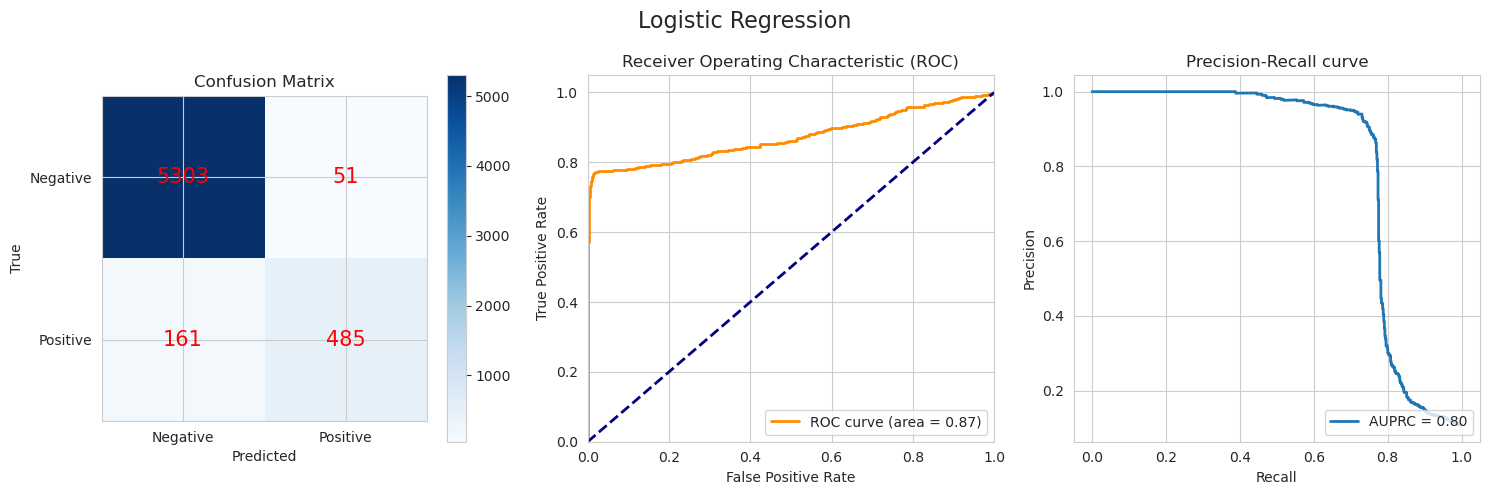

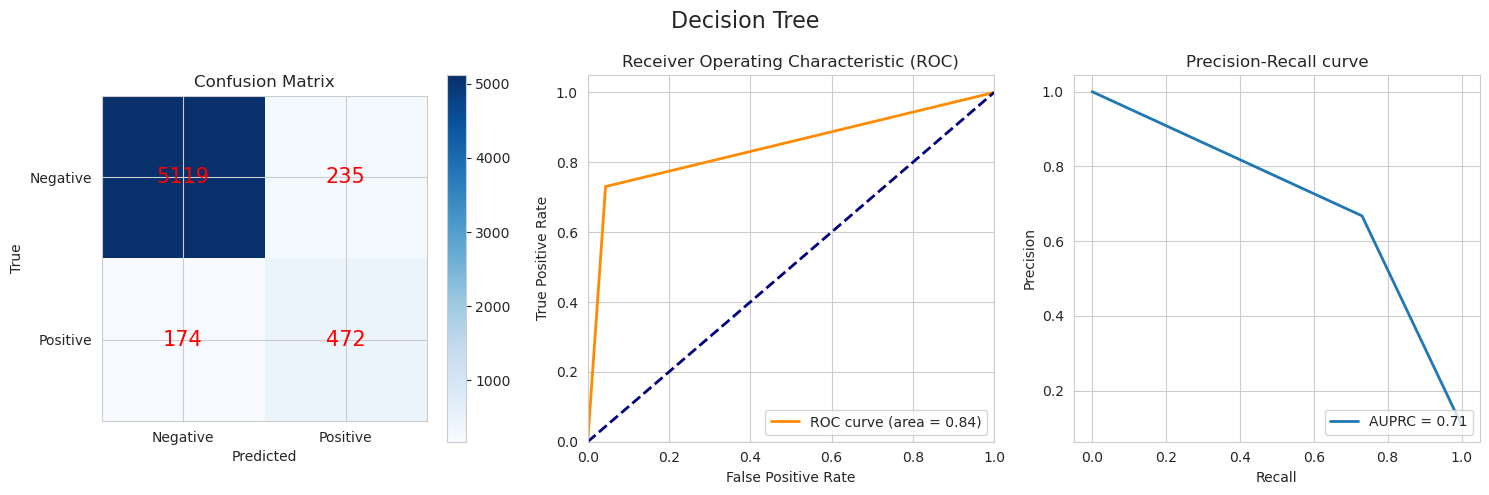

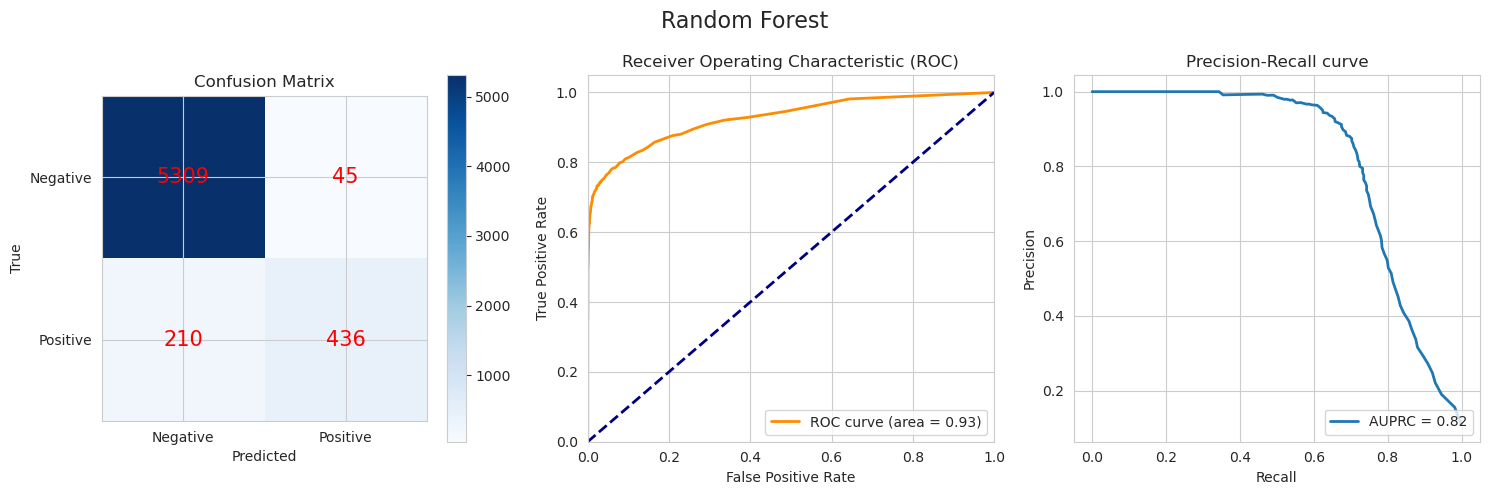

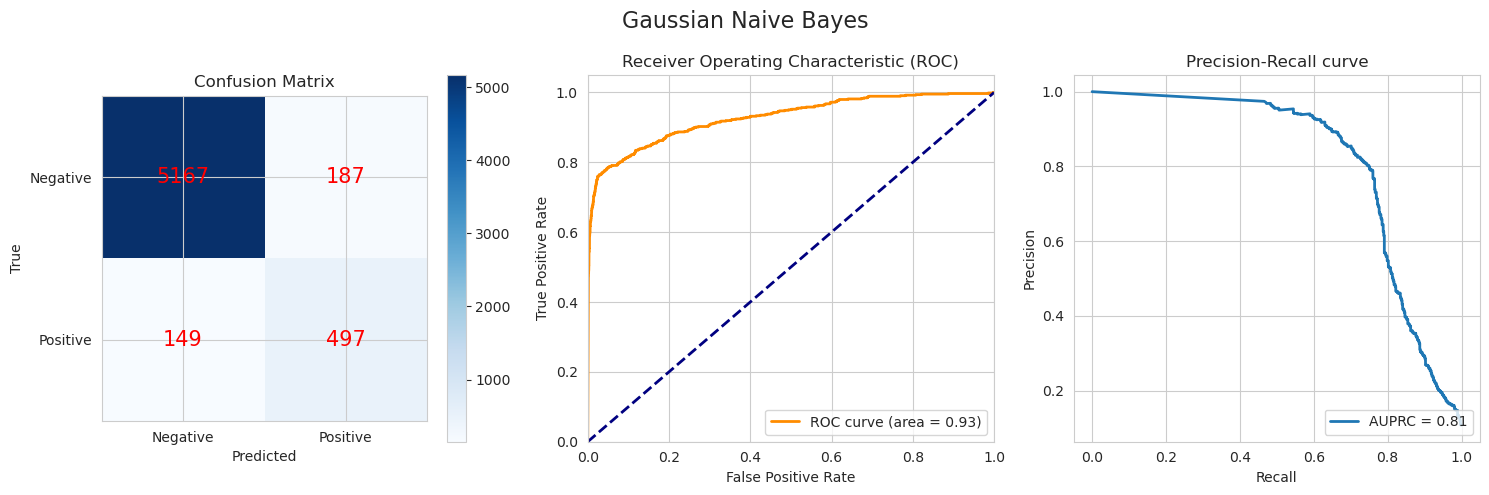

In [49]:
results_pred = fit_and_evaluate_models(data_pred_impute, "Income")

Random forest and logistic regression are giving overall good perfromance.

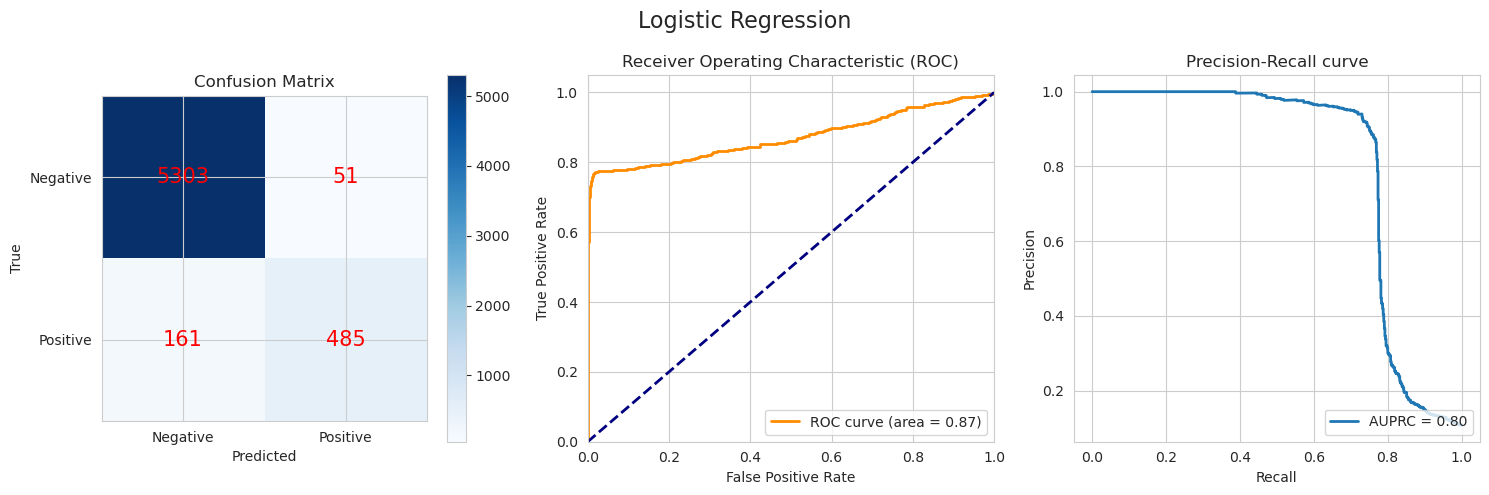

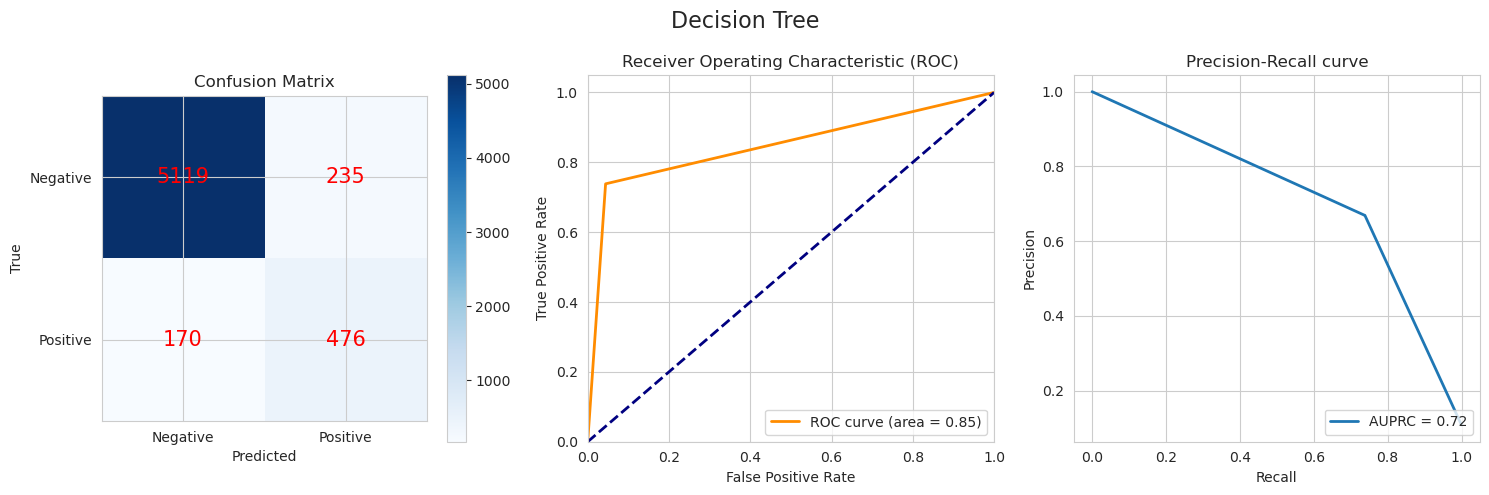

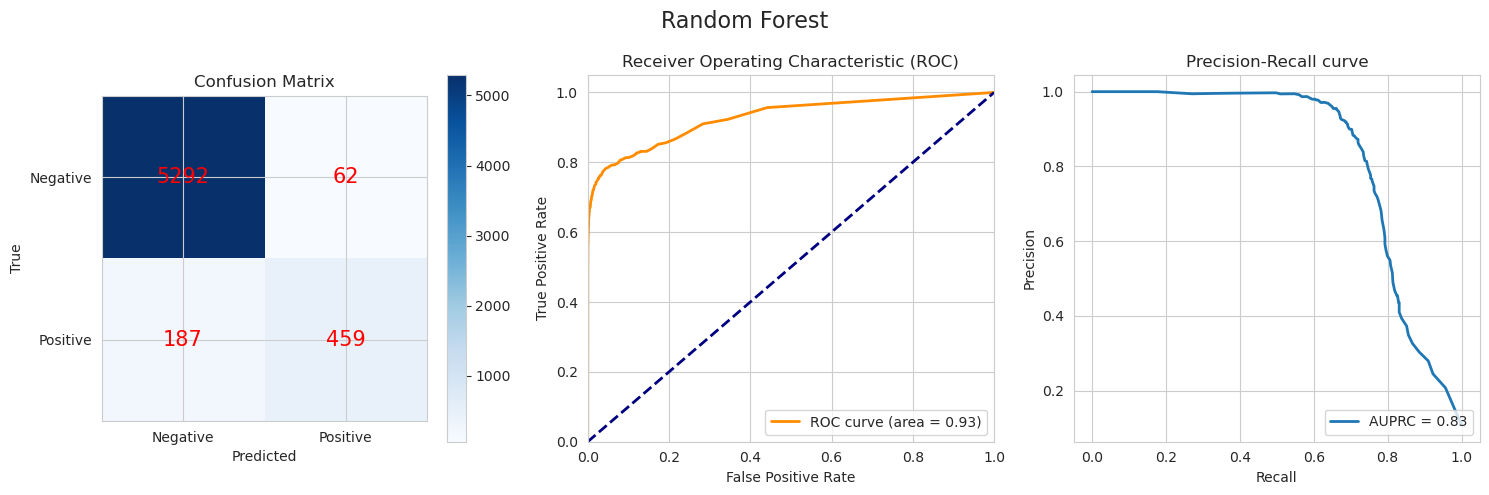

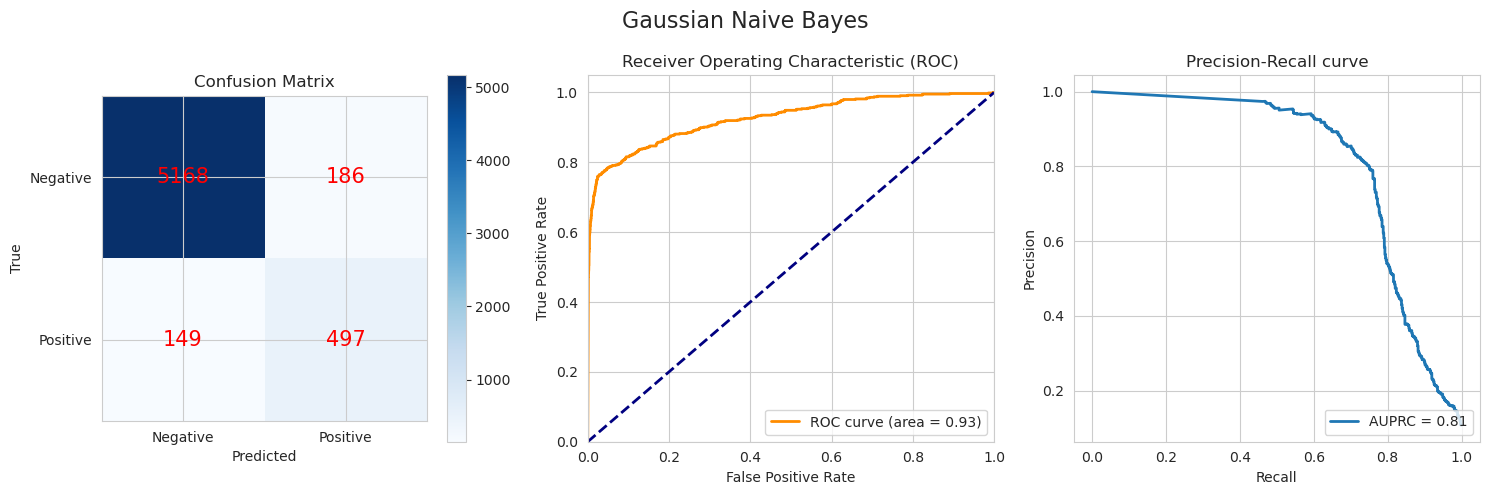

In [50]:
results_imp = fit_and_evaluate_models(imp_df, "Income")

The dataset with lesser no.of features also yeilds almost identical performance with slightly better AUPrc as the high dimensional datatset.

In [52]:
print_results("Metrics on dataset with predective imputation",results_pred)
print_results("Same data set after feature selection through Random forest",results_imp)

#print_results("Same data set after feature selection through Random forest",results_scaled)

Metrics on dataset with predective imputation
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Model                |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |    AUPRC |
+======================+============+=============+==========+============+===========+==========+
| Logistic Regression  |   0.964667 |    0.904851 | 0.750774 |   0.820643 |  0.872821 | 0.804762 |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Decision Tree        |   0.931833 |    0.66761  | 0.73065  |   0.697709 |  0.843379 | 0.71363  |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Random Forest        |   0.9575   |    0.906445 | 0.674923 |   0.773736 |  0.926638 | 0.81987  |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Gaussian Naive Bayes |   0.944    |    0.726608 | 0.76935  | 

### Evaluation through cross validation

In [54]:

def evaluate_classification_models(data, target_column_name, num_folds=5):
    # Extract features and target variable
    X = data.drop(columns=[target_column_name])
    y = data[target_column_name]
    
    # Initialize classifiers
    classifiers = {
        "Logistic Regression": LogisticRegression(),
        "Decision Tree": DecisionTreeClassifier(), 
        "Random Forest": RandomForestClassifier(),
        "Gaussian Naive Bayes": GaussianNB()
         
    }

    
    # Initialize dictionary to store results
    results = {}
    
    # Perform stratified k-fold cross-validation
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    for clf_name, clf in classifiers.items():
        metrics = {
            'Accuracy': [],
            'Precision': [],
            'Recall': [],
            'F1 Score': [],
            'ROC-AUC': [],
            'AUPRC': []
        }
        
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
            auc_prc = average_precision_score(y_test, clf.predict_proba(X_test)[:, 1])
            
            metrics['Accuracy'].append(accuracy)
            metrics['Precision'].append(precision)
            metrics['Recall'].append(recall)
            metrics['F1 Score'].append(f1)
            metrics['ROC-AUC'].append(roc_auc)
            metrics['AUPRC'].append(auc_prc)
        
        # Calculate mean metrics for the current model
        mean_metrics = {}
        for metric, values in metrics.items():
            mean_metrics[metric] = np.mean(values)
        
        results[clf_name] = mean_metrics
    
    return results


In [55]:
# 10 fold cv 
result_after_cv = evaluate_classification_models(imp_df, 'Income', num_folds=10)

In [57]:
print_results("Results after 10 fold CV",result_after_cv)

Results after 10 fold CV
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Model                |   Accuracy |   Precision |   Recall |   F1 Score |   ROC-AUC |    AUPRC |
+======================+============+=============+==========+============+===========+==========+
| Logistic Regression  |   0.960933 |    0.904641 | 0.731488 |   0.808597 |  0.852249 | 0.782037 |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Decision Tree        |   0.9297   |    0.683846 | 0.704936 |   0.6937   |  0.831582 | 0.515368 |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Random Forest        |   0.956433 |    0.88683  | 0.704639 |   0.784893 |  0.926023 | 0.818936 |
+----------------------+------------+-------------+----------+------------+-----------+----------+
| Gaussian Naive Bayes |   0.9387   |    0.719805 | 0.750369 |   0.734408 |  0.91939

### Hyperparameter tuning the random forest model through grid search

In [58]:
# Creating X and Y instances 
X = imp_df.drop(columns=['Income'])  # X contains all columns except 'Income'
Y = imp_df['Income']  # Y 

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

def grid_search_random_forest(X, y, param_grid, cv=5, scoring='accuracy', random_state=None):
    """
    Perform GridSearchCV on a Random Forest binary classifier.

    Parameters:
    - X: The feature matrix.
    - y: The target variable.
    - param_grid: A dictionary specifying the hyperparameters to search and their possible values.
    - cv: The number of cross-validation folds (default is 5).
    - scoring: The scoring metric for evaluation (default is 'accuracy').
    - random_state: Random seed for reproducibility (default is None).

    Returns:
    - best_params: The best hyperparameters found by GridSearchCV.
    - best_score: The best cross-validation score.
    - cv_results: The full results of the cross-validation.
    """

    # Create a Random Forest classifier
    rf_classifier = RandomForestClassifier(random_state=random_state)

    # Create GridSearchCV object with scoring
    grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Perform the grid search
    grid_search.fit(X, y)

    # Get the best hyperparameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Get the full results of the cross-validation
    cv_results = grid_search.cv_results_

    return best_params, best_score, cv_results


In [60]:
param_grid = {
        'n_estimators': [50, 100, 200, 300],
     "criterion": ["gini", "entropy"],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [10, 15, 20, 25],
        'min_samples_leaf': [1, 2, 4, 8]
    }

In [61]:
 # Perform GridSearchCV
best_params, best_score, cv_results = grid_search_random_forest(X, Y, param_grid)

    # Print the best hyperparameters and score
#print("Best Hyperparameters:", best_params)
#print("Best Cross-Validation Score:", best_score)
#print("Grid Search Results:", cv_results)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [62]:
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)
#print("Grid Search Results:", cv_results)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.9584000000000001


#### Re modeling using the best parameters

In [66]:

def train_and_evaluate_rf(data, dependent_column):
    # Split the dataset into features (X) and the target variable (y)
    X = data.drop(dependent_column, axis=1)
    y = data[dependent_column]

    # Define hyperparameters
    hyperparameters = {
        'criterion': 'entropy',
        'max_depth': 20,
        'min_samples_leaf': 1,
        'min_samples_split': 10,
        'n_estimators': 200
    }

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train a Random Forest classifier
    rf_classifier = RandomForestClassifier(**hyperparameters)
    rf_classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_classifier.predict(X_test)
    y_prob = rf_classifier.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate precision-recall curve and AUPRC
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    auprc = auc(recall_curve, precision_curve)

    # Create confusion matrix subplot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    plt.subplots_adjust(wspace=0.3)

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('True')
    axes[0].set_title('Confusion Matrix')

    # ROC Curve subplot
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    axes[1].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[1].set_xlim([0.0, 1.0])
    axes[1].set_ylim([0.0, 1.05])
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[1].legend(loc='lower right')

    # Precision-Recall Curve subplot
    axes[2].plot(recall_curve, precision_curve, lw=2, label='AUPRC = {:.2f}'.format(auprc))
    axes[2].set_xlabel('Recall')
    axes[2].set_ylabel('Precision')
    axes[2].set_title('Precision-Recall Curve')
    axes[2].legend(loc='lower right')

    # Show the plots
    plt.show()

    # Return evaluation metrics as a dictionary
    evaluation_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC': roc_auc,
        'AUPRC': auprc
    }

    return evaluation_metrics



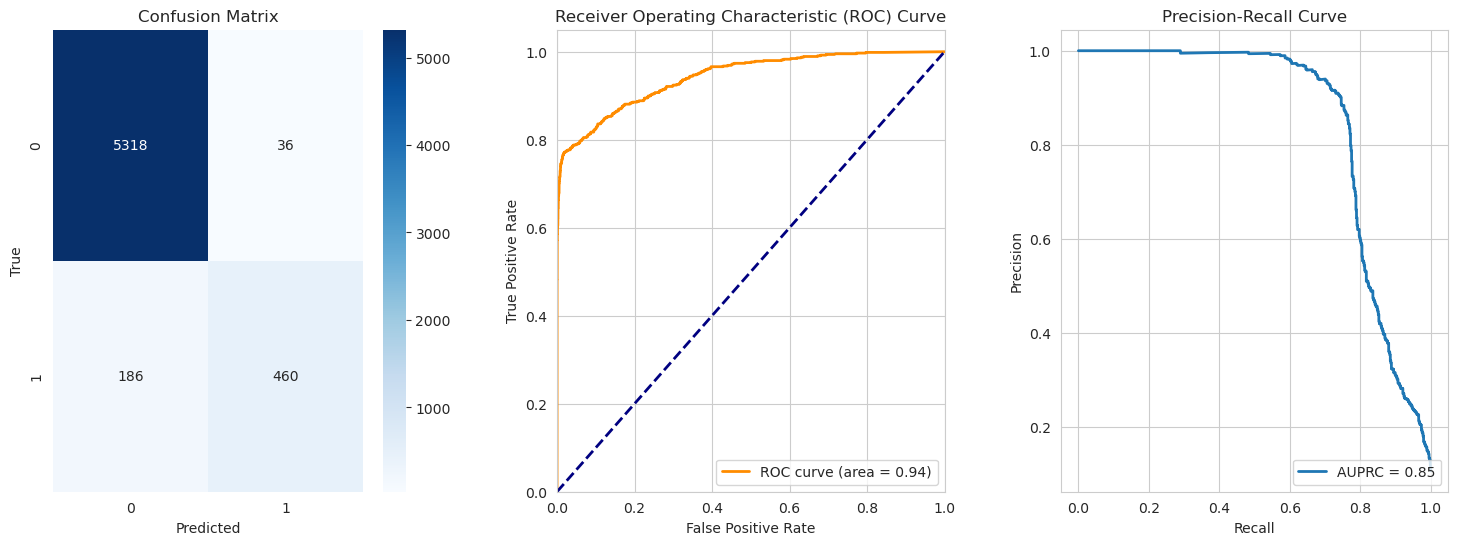

In [67]:
evaluation_results = train_and_evaluate_rf(imp_df, 'Income')

In [75]:
print("RF forest results after hyper parameter tuning: \n",evaluation_results)

RF forest results after hyper parameter tuning: 
 {'Accuracy': 0.963, 'Precision': 0.9274193548387096, 'Recall': 0.7120743034055728, 'F1 Score': 0.8056042031523643, 'AUC': 0.9422247016495291, 'AUPRC': 0.8456369547651206}


### CV on tuned model

In [71]:
# Evaluating the tuned model on 10 fold CV
def evaluate_random_forest_classifier(dataset, dependent_column_name):
    # Extract features and labels
    X = dataset.drop(dependent_column_name, axis=1)
    y = dataset[dependent_column_name]

    # Define hyperparameters
    hyperparameters = {
        'criterion': 'entropy',
        'max_depth': 20,
        'min_samples_leaf': 1,
        'min_samples_split': 10,
        'n_estimators': 200
    }

    # Initialize Random Forest Classifier with specified hyperparameters
    clf = RandomForestClassifier(**hyperparameters)

    # Initialize Stratified K-Fold Cross-Validator
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Lists to store metric values for each fold
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    aucs = []
    auprcs = []

    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Fit the classifier and get predictions
        clf.fit(X_train, y_train)
        y_pred = clf.predict_proba(X_test)[:, 1]

        # Calculate evaluation metrics for each fold
        accuracy = accuracy_score(y_test, (y_pred >= 0.5).astype(int))
        precision = precision_score(y_test, (y_pred >= 0.5).astype(int))
        recall = recall_score(y_test, (y_pred >= 0.5).astype(int))
        f1 = f1_score(y_test, (y_pred >= 0.5).astype(int))
        auc = roc_auc_score(y_test, y_pred)
        auprc = average_precision_score(y_test, y_pred)

        # Append metrics to lists
        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        aucs.append(auc)
        auprcs.append(auprc)

    # Calculate the mean of metrics across all folds
    mean_metrics = {
        'Mean Accuracy': np.mean(accuracies),
        'Mean Precision': np.mean(precisions),
        'Mean Recall': np.mean(recalls),
        'Mean F1 Score': np.mean(f1_scores),
        'Mean AUC': np.mean(aucs),
        'Mean AUPRC': np.mean(auprcs)
    }

    return mean_metrics


In [72]:
metrics = evaluate_random_forest_classifier(imp_df, 'Income')



{'Mean Accuracy': 0.9597333333333333, 'Mean Precision': 0.921395627669986, 'Mean Recall': 0.7037553891536192, 'Mean F1 Score': 0.7975695251086459, 'Mean AUC': 0.9417802609468765, 'Mean AUPRC': 0.8354133466055848}


In [76]:
print('Tuned RF metrics after 10 fold cv: \n',metrics)

Tuned RF metrics after 10 fold cv: 
 {'Mean Accuracy': 0.9597333333333333, 'Mean Precision': 0.921395627669986, 'Mean Recall': 0.7037553891536192, 'Mean F1 Score': 0.7975695251086459, 'Mean AUC': 0.9417802609468765, 'Mean AUPRC': 0.8354133466055848}


In [77]:
# Define the data
rf_data = [
    ["Metric", "Random Forest (Before)", "Random Forest (After Hyperparameter Tuning)"],
    ["Accuracy", 0.956433, 0.959733],
    ["Precision", 0.88683, 0.921396],
    ["Recall", 0.704639, 0.703755],
    ["F1 Score", 0.784893, 0.797570],
    ["AUC", 0.926023, 0.941780],
    ["AUPRC", 0.818936, 0.835413],
]

# Create the table
table = tabulate(rf_data, headers="firstrow", tablefmt="pipe")

# Print the table
print(table)


| Metric    |   Random Forest (Before) |   Random Forest (After Hyperparameter Tuning) |
|:----------|-------------------------:|----------------------------------------------:|
| Accuracy  |                 0.956433 |                                      0.959733 |
| Precision |                 0.88683  |                                      0.921396 |
| Recall    |                 0.704639 |                                      0.703755 |
| F1 Score  |                 0.784893 |                                      0.79757  |
| AUC       |                 0.926023 |                                      0.94178  |
| AUPRC     |                 0.818936 |                                      0.835413 |




## Summary and Conclusion:

The primary objective of this project was to construct a binary classification model capable of predicting whether an individual's income exceeds or falls below $50,000 USD. The dataset provided for this task encompassed 15 columns, with the "income" column serving as the dependent variable. Several preprocessing steps were employed to prepare the dataset for modeling.

Missing values within categorical columns were addressed using mode imputation, ensuring that the dataset remained complete.and for the "Income" column two techniques 1. random sampling and 2. Predective imputation was emlployed. 

Two distinct datasets emerged from these different approaches to imputation. These datasets were subsequently subjected to predictive modeling using various algorithms, including Logistic Regression, Decsion tree, Naive Bayes, and Random Forest. Notably, models built on the dataset imputed using predictive modeling consistently outperformed those constructed on the dataset imputed through random sampling. All models derived from the predictive imputation method achieved accuracy scores exceeding 0.94, whereas the alternative approach yielded accuracies around 0.7. To establish a baseline for comparison, a random prediction model was also evaluated, achieving an accuracy of approximately 0.5.

Further analysis involved feature importance assessment using Random Forest, which assigned scores to each feature. Subsequently, feature selection was performed based on these scores, resulting in the retention of only eight key features. Surprisingly, models constructed on this reduced-dimensional dataset had slightly improved performance.

To validate the model's robustness and mitigate concerns of overfitting, a 10-fold cross-validation procedure was applied. Remarkably, the results closely mirrored those obtained without cross-validation, reinforcing the model's reliability.

Lastly, hyperparameter tuning was conducted using GridSearchCV for the best performing model, i.e, Random forest and this improved the results. 